# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


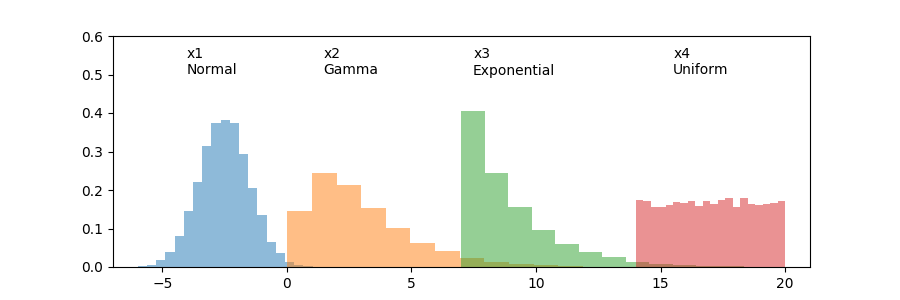

In [13]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)


# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


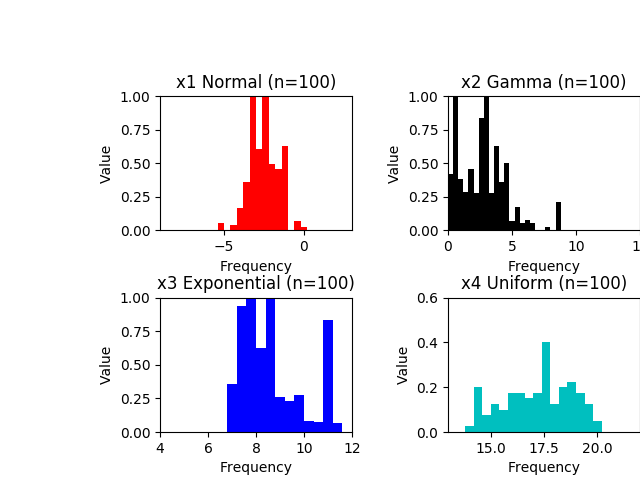

In [23]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

fig = plt.figure()
gspec = gridspec.GridSpec(2,2)

gspec.update(wspace=0.5, hspace=0.5, left = 0.25, right=1.0, bottom = 0.1, top = 0.8)

normalHist = plt.subplot(gspec[0,0])
gammaHist = plt.subplot(gspec[0,1])
exponentialHist = plt.subplot(gspec[1,0])
uniformHist = plt.subplot(gspec[1,1])
Histo = [normalHist, gammaHist,exponentialHist, uniformHist]

x = [x1,x2,x3,x4]

axisNormal = [-9, 3, 0, 1]
axisGamma = [ 0, 15, 0, 1]
axisExponential = [4, 12, 0, 1]
axisUniform = [13, 22, 0 , 0.6]
axeS = [axisNormal, axisGamma, axisExponential, axisUniform]

titles = ['x1 Normal', 'x2 Gamma', 'x3 Exponential', 'x4 Uniform']
colors = ['r', 'k', 'b', 'c']

bins1 = np.arange(-9, 3, 0.4)
bins2 = np.arange(0,10 , 0.4)
bins3 = np.arange(4, 12, 0.4)
bins4 = np.arange(13, 22, 0.4)
bins = [bins1, bins2, bins3, bins4]

def update(curr):
    if curr == 100:
        a.event_source.stop()
    plt.cla()
    for (histog, bin_item, y, a_lim, title, col) in zip(Histo, bins, x, axeS, titles, colors):
        histog.hist(y[:curr], normed=True, bins=bin_item, color=col)
        histog.axis(a_lim)
        histog.set_title(title + ' (n={})'.format(curr))
        histog.set_xlabel('Frequency')
        histog.set_ylabel('Value')
a = animation.FuncAnimation(fig, update, interval = 100)